# Die KQ-Methode

In dieser Übung werden wir als Beispiel Daten über ein Buchchaltungsunternehmen verwenden. Das Unternehmen erhält täglich Rechnungen von seinen Kunden und bearbeitet sie (z.B. prüft sie, gibt sie in das Buchhaltungssystem ein, etc.). Der Datensatz enthält die Anzahl der bearbeiteten Rechnungen an jedem Tag und die dafür benötigte Zeit. Unser Ziel ist es, die Zeit vorherzusagen, die benötigt wird, um eine gegebene Anzahl von Rechnungen zu bearbeiten.

Die Variablen in dem Datensatz sind:

- `Day` (numeric): Tag der Beobachtung
- `Invoices` (numeric): Die Anzahl der bearbeiteten Rechnungen
- `Time` (numeric): Die Bearbeitungszeit in Stunden

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Einlesen der Daten
df = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/invoices.txt', delimiter="\t")
df.head()

,Day,Invoices,Time
0,1,149,2.1
1,2,60,1.8
2,3,188,2.3
3,4,23,0.8
4,5,201,2.7


Eine erste Zusammenfassung der Daten

In [3]:
df.describe()

,Day,Invoices,Time
count,30.000000,30.000000,30.00000
mean,15.500000,130.033333,2.11000
std,8.803408,74.825537,0.90491
min,1.000000,23.000000,0.80000
25%,8.250000,62.500000,1.50000
50%,15.500000,127.500000,2.00000
75%,22.750000,189.500000,2.77500
max,30.000000,289.000000,4.10000


Zuerst werden wir den Datensatz in einem Streudiagramm visualisieren. Der Zweck der Visualisierung ist es, eine erste Einsicht über die Assoziation zwischen den Variablen `Invoices` und `Time` zu bekommen.

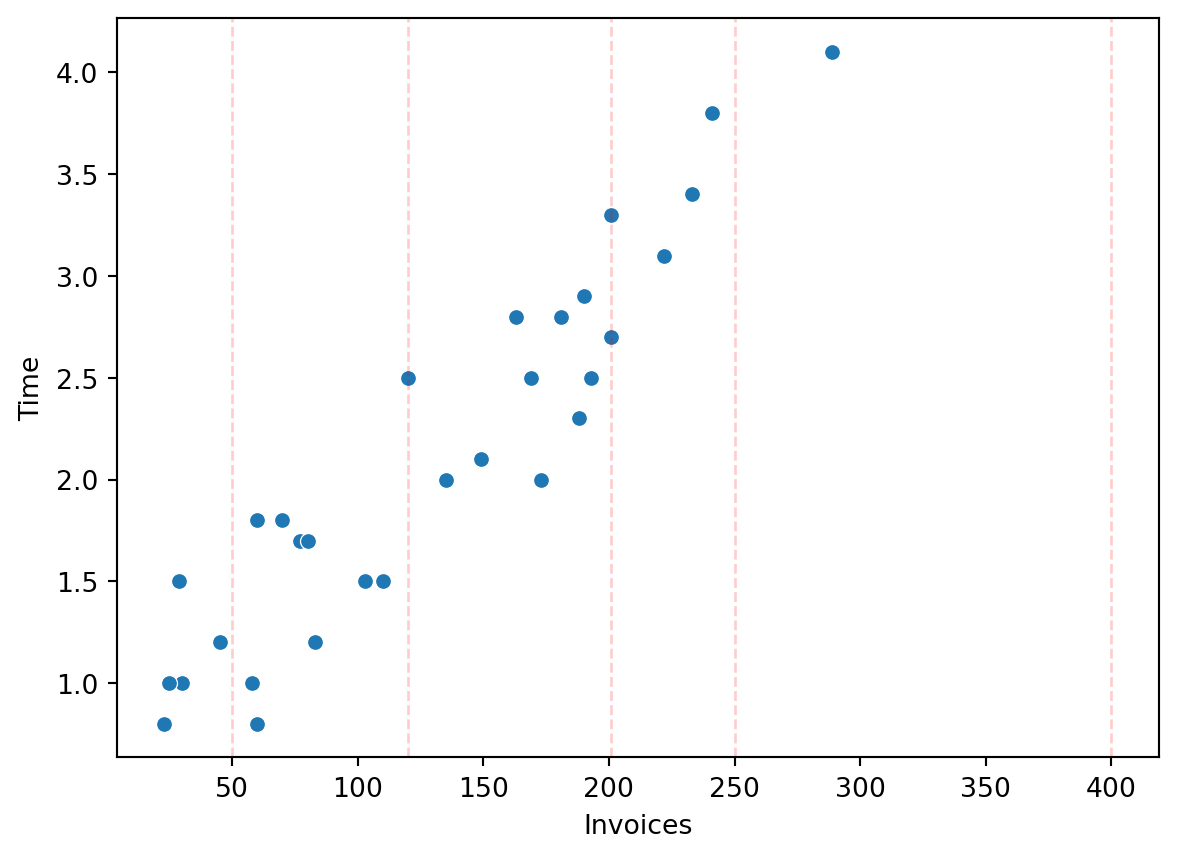

In [4]:
#| label: fig-invoices-scatter
#| fig-cap: Streudiagramm der Bearbeitungszeit der Rechnungen und der Anzahl der Rechnungen.

fig, ax = plt.subplots()

sns.scatterplot(data=df, x="Invoices", y="Time", ax=ax)

for x in [50, 120, 201, 250, 400]:
    ax.axvline(x, color='r', linestyle='--', lw=1, alpha=0.2)

Wie können wir die Zeit vorhersagen, die benötigt wird, um eine gegebene Anzahl von Rechnungen zu bearbeiten? Die roten vertikalen Geraden in @fig-invoices-scatter sind bei 50, 120, 201, 250, 400. Für diese Anzahlen von Rechnungen wollen wir die Bearbeitungszeit vorhersagen.

**Strategie 1**

Eine einfache Methode wäre, die Bearbeitungszeit einfach mit der durchschnittlichen Bearbeitungszeit vorherzusagen.

**Strategie 2**

Eine andere Möglichkeit wäre, eine Gleichung zu unterstellen, um die Anzahl der Rechnungen zu berücksichtigen. Eine lineare Gleichung könnte z.B. so aussehen (die Koeffizienten sind hier nur Beispiele, es gibt keine konkrete Rechtfertigung für diese Werte):

$$
\widehat{\text{Time}}^{eq1} = 0.6 + 0.01 \text{Invoices}
$$


:::{#exr-prediction-strategies}
## Aufgabe 1
Berechnen Sie die Vorhersagen für die Bearbeitungszeit für die zwei Strategien.

:::


In [5]:
# Strategie 1


In [6]:
# Strategie 2


In [7]:
# Strategie 1

time_predicted_avg = df['Time'].mean()

res_avg = df['Time'] - time_predicted_avg
res_avg.head()

0   -0.01
1   -0.31
2    0.19
3   -1.31
4    0.59
Name: Time, dtype: float64

In [8]:
# Ein Modell, das die Anzahl der Rechnungen berücksichtigt:

time_predicted_eq1 = 0.6 + 0.01 * df['Invoices']

res_eq1 = df['Time'] - time_predicted_eq1
res_eq1.head()

0    0.01
1    0.60
2   -0.18
3   -0.03
4    0.09
dtype: float64

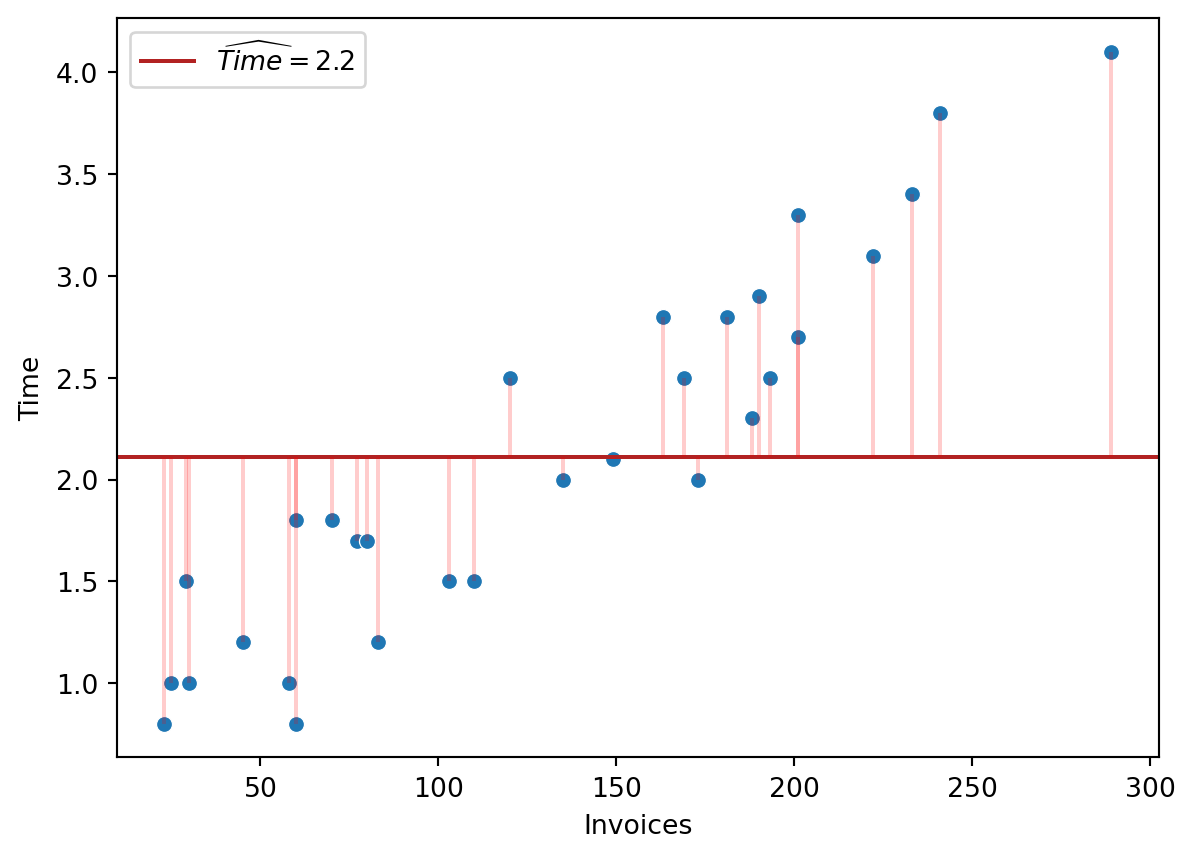

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x="Invoices", y="Time", ax=ax)

ax.axhline(y=time_predicted_avg, xmin=0, xmax=300, color="firebrick", label=r"$\widehat{Time} = 2.2$")
ax.legend(loc=0)
ax.vlines(x=df["Invoices"], ymin=time_predicted_avg, ymax=df["Time"], color="red", alpha=0.2)

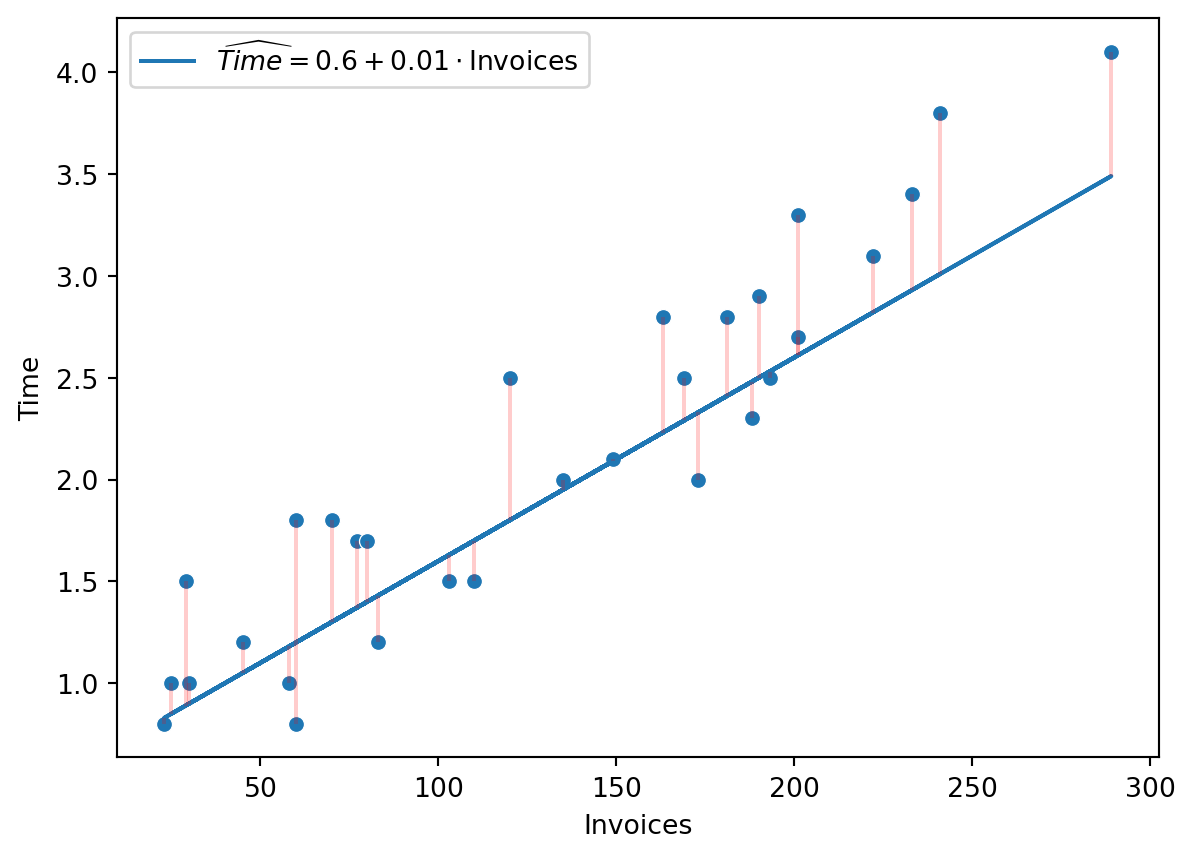

In [10]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x="Invoices", y="Time", ax=ax)

ax.plot(df["Invoices"], time_predicted_eq1, "-", label=r"$\widehat{Time} = 0.6 + 0.01 \cdot \text{Invoices}$")
ax.legend(loc=0)
ax.vlines(x=df["Invoices"], ymin=time_predicted_eq1, ymax=df["Time"], color="red", alpha=0.2)

Welche Strategie passt ist besser? Um dieser Frage eine Antwort zu geben, müssen wir uns auf ein Kriterium einigen, das wir verwenden, um die Vorhersagen zu bewerten und zu vergleichen.

Wir könnten z.B. die mittlere Differenz zwischen den Vorhersagen und den beobachteten Werten verwenden.

$$
\text{Mittlere Differenz} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

Dabei sind $y_i$ die beobachteten Werte und $\hat{y}_i$ die Vorhersagen.

:::{#exr-mse}
## Aufgabe 2
Berechnen Sie die mittlere Differenz und den MSE für die beiden Strategien.

:::

In [11]:
# Strategie 1


In [12]:
# Strategie 2


Dieses scheint allerdings unsinnige Ergebnisse zu produzieren, denn die Prognosen des zweiten Modells offensichtlich näher an den Daten liegen. Die Summe der Abweichungen ist allerdings größer als beim ersten Modell. Das liegt daran, daß sich positive und negative Abweichungen in der Summe gegenseitig aufheben. Um das zu vermeiden, könnten wir die z.B. die Beträge der Abweichungen summieren

$$
\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Es ist allerdings viel einfacher, die quadratischen Abweichungen zu summieren, denn die quadratische Funktion ist stetig differenzierbar und das ist mathematisch sehr bequem.

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Um hervorzuheben, daß die Residuenquadratsumme von den Koeffizienten $\hat{\beta}_0$ und $\hat{\beta}_1$ abhängt, schreiben wir die Residuenquadratsumme als Funktion der Koeffizienten.

$$
\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
$$

:::{#exr-rss}
## Aufgabe 3
Berechnen Sie die Residuenquadratsumme für die beiden Strategien.

:::

In [13]:
# Strategie 1


In [14]:
# Strategie 2


In [15]:
# Ihre Strategie
# Versuchen Sie eine eigene Strategie zu entwickeln, indem Sie Koeffizienten 
# wählen, die die Residuenquadratsumme möglichst klein machen.

# Berechnen Sie die RSS für Ihre Strategie und vergleichen Sie sie mit den anderen Strategien.



Lasst uns die Residuenquadratsumme für verschiedene Werte der Koeffizienten berechnen und die Ergebnisse graphisch darstellen. Wir werden die Residuenquadratsumme als Funktion der Koeffizienten in einem 3D-Diagramm darstellen.

Text(0.5, 0, 'RSS')

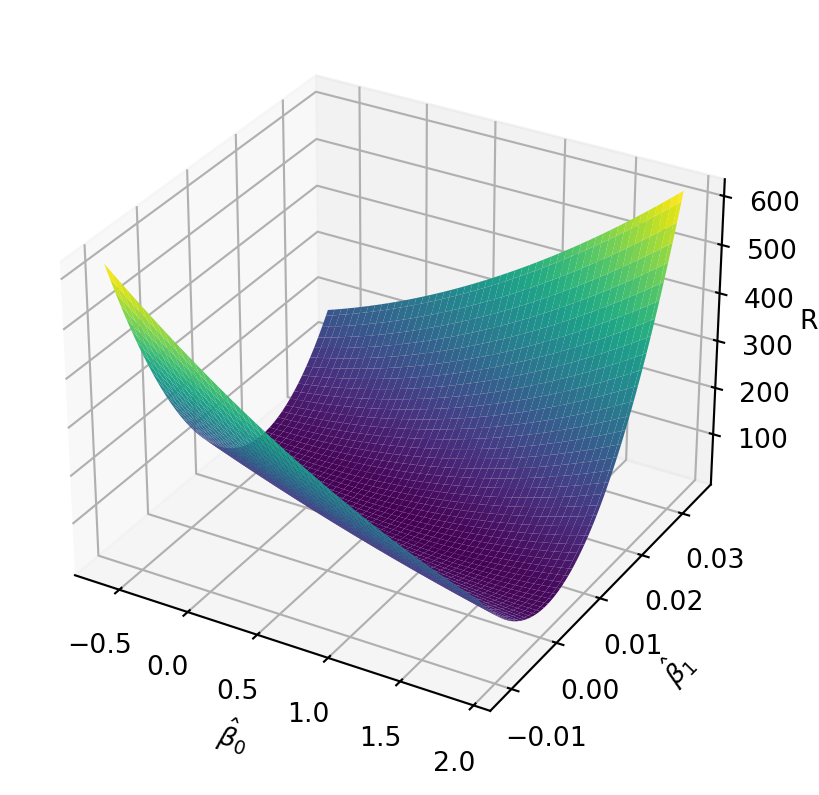

In [16]:
# NOTE: der Code ist nur da, um die RSS zu berechnen und zu visualisieren.
# Sie müssen ihn nicht studieren oder verstehen

exp_f = 2

bb0, bb1 = np.meshgrid(
    np.linspace(0.6417 - 0.6417 * exp_f, 0.6417 + 0.6417 * exp_f, 100),
    np.linspace(0.0113 - 0.0113 * exp_f, 0.0113 + 0.0113 * exp_f, 100)
)

rss = np.zeros_like(bb0)

for i in range(bb0.shape[0]):
    for j in range(bb0.shape[1]):
        time_predicted = bb0[i, j] + bb1[i, j] * df['Invoices']
        res = df['Time'] - time_predicted
        rss[i, j] = np.sum(res**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bb0, bb1, rss, cmap='viridis')

ax.set_xlabel(r"$\hat{\beta}_0$")
ax.set_ylabel(r"$\hat{\beta}_1$")
ax.set_zlabel('RSS')

Zuerst werden wir das Problem in einem sehr einfachen Fall betrachten. Betrachten wir die Vorhersagegleichung

$$
\hat{y} = \hat{\beta}_0
$$

Das ist eine sehr einfache Vorhersagegleichung, die nur einen Koeffizienten hat. Die Vorhersage ist für alle Werte von $x$ gleich $\hat{\beta}_0$ (d.h. die Vorhersage ist eine horizontale Gerade). Wo sollten wir diese horizontale Gerade zeichnen, um die Residuenquadratsumme zu minimieren?

Die Antwort mag nicht ganz offenbar sein, aber es ist letztendlich sehr einfach.


Für die Gleichung oben ist die Residuenquadratsumme:

$$
\text{RSS}(\hat{\beta}_0) = \sum_{i=1}^{n} (y_i - \hat{\beta}_0)^2
$$

:::{#exr-rss-1d}    
## KQ-Methode im Intercept-Only-Modell

Leiten Sie den Wert von $\hat{\beta}_0$ her, der die Residuenquadratsumme minimiert.
:::
:::{.proof collapse="True"}
Wir fangen mit der ersten Ableitung der Residuenquadratsumme nach $\hat{\beta}_0$ an.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_0} RSS(\hat{\beta}_0) & = 
\sum_{i=1}^n 2(y_i - \hat{\beta}_0) \cdot (-1) \\
& = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0) \\
& = -2 \sum_{i=1}^n y_i + 2 \sum_{i=1}^n \hat{\beta}_0 \\
& = -2 \sum_{i=1}^n y_i + 2 n \hat{\beta}_0
\end{align*}
$$

Die notwendige Bedingung für ein Extremum (Minimum oder Maximum) ist, daß die erste Ableitung gleich Null ist.

$$
\begin{align*}
-2 \sum_{i=1}^n y_i + 2 n \hat{\beta}_0 & = 0 \\
\hat{\beta}_0 & = \frac{1}{n} \sum_{i=1}^n y_i \\
& = \overline{y}
\end{align*}
$$

Der optimale Wert von $\hat{\beta}_0$, der die Residuenquadratsumme minimiert, ist eifach der Durchschnitt der beobachteten Werte.
:::

## The one variable case

Now let us consider the case where we have two variables, $\text{Invoices}_i$ and $\text{Time}_i$. We want to find the values of $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize the RSS.

The prediction equation is

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i
$$

The RSS is (as above)

$$
\begin{align*}
\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
  & = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
\end{align*}
$$

The first order conditions for the minimum are

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_0} \text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0 \\
\frac{\partial}{\partial \hat{\beta}_1} \text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) x_i = 0
\end{align*}
$$

The first equation gives

$$
\begin{align*}
\sum_{i=1}^n y_i - \hat{\beta}_0 n - \hat{\beta}_1 \sum_{i=1}^n x_i & = 0 \\
\hat{\beta}_0 n + \hat{\beta}_1 \sum_{i=1}^n x_i & = \sum_{i=1}^n y_i \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

The second equation gives

$$
\begin{align*}
\sum_{i=1}^n y_i x_i - \hat{\beta}_0 \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = 0 \\
\hat{\beta}_0 \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

Substituting the expression for $\hat{\beta}_0$ in the second equation, we get

$$
\begin{align*}
(\overline{y} - \hat{\beta}_1 \overline{x}) \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\overline{y} \sum_{i=1}^n x_i - \hat{\beta}_1 \overline{x} \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i - \overline{y} \sum_{i=1}^n x_i + \hat{\beta}_1 \overline{x} \sum_{i=1}^n x_i \\
\hat{\beta}_1 & = \frac{\sum_{i=1}^n y_i x_i - \overline{y} \sum_{i=1}^n x_i}{\sum_{i=1}^n x_i^2 - \overline{x} \sum_{i=1}^n x_i}
\end{align*}
$$

Simplyfing the expression, we get

$$
\begin{align*}
\hat{\beta}_1 & = \frac{\overline{x y} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

The last expression may seem a bit complicated, but it is actually quite simple. It is just the ratio between the empirical covariance between $x_i$ and $y_i$ divided by the variance of $x_i$.

The empirical covariance between $x_i$ and $y_i$ is defined as the sum of the products of the deviations of $x_i$ and $y_i$ from their respective means, divided by the number of observations.

:::{#def-covariance}
## Covariance

The covariance between two variables $x$ and $y$ with $n$ values is defined as

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})
$$

:::

:::{#def-variance-decomposition}
## Variance decomposition

We have already defined the variance of a variable $x$ as

$$
S_x^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \overline{x})^2
$$

It can be shown that the variance of $x$ can be decomposed into the sum of the squared mean and the variance of the deviations from the mean.

$$
S_x^2 = \frac{1}{n  - 1}(\overline{x_i^2} - \overline{x}^2)
$$
:::
:::{.proof}
The proof is straightforward. We have

$$
\begin{align*}
(n - 1) S_x^2 & =  \sum_{i=1}^n (x_i - \overline{x})^2 \\
& =  \sum_{i=1}^n (x_i^2 - 2x_i \overline{x} + \overline{x}^2) \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x} \sum_{i=1}^n x_i + \overline{x}^2 \sum_{i=1}^n 1 \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x} \sum_{i=1}^n x_i + \overline{x}^2 n \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x}^2 n + \overline{x}^2 n \\
& =  \sum_{i=1}^n x_i^2 - n \overline{x}^2 \\
& = n (\overline{x_i^2} - \overline{x}^2)
\end{align*}
$$
:::

:::{#def-covariance}
## Covariance and Covariance decomposition

The covariance between two variables $x$ and $y$ with $n$ values is defined as

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})
$$

Much in the same way as the variance, the covariance can be decomposed into the sum of the squared mean and the variance of the deviations from the mean.

$$
(n - 1) S_{xy} = n(\overline{x y} - \overline{x} \overline{y})
$$

The proof is similar to the proof for the variance decomposition.
:::
:::{.proof}
The proof is straightforward. We have

$$
\begin{align*}
(n - 1) S_{xy} & = \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) \\
& = \sum_{i=1}^n x_i y_i - \overline{x} \sum_{i=1}^n y_i - \overline{y} \sum_{i=1}^n x_i + n \overline{x} \overline{y} \\
& = n(\overline{x y} - \overline{x} \overline{y})
\end{align*}
$$
:::

To understand what the covariance measures, consider the following scatterplot:


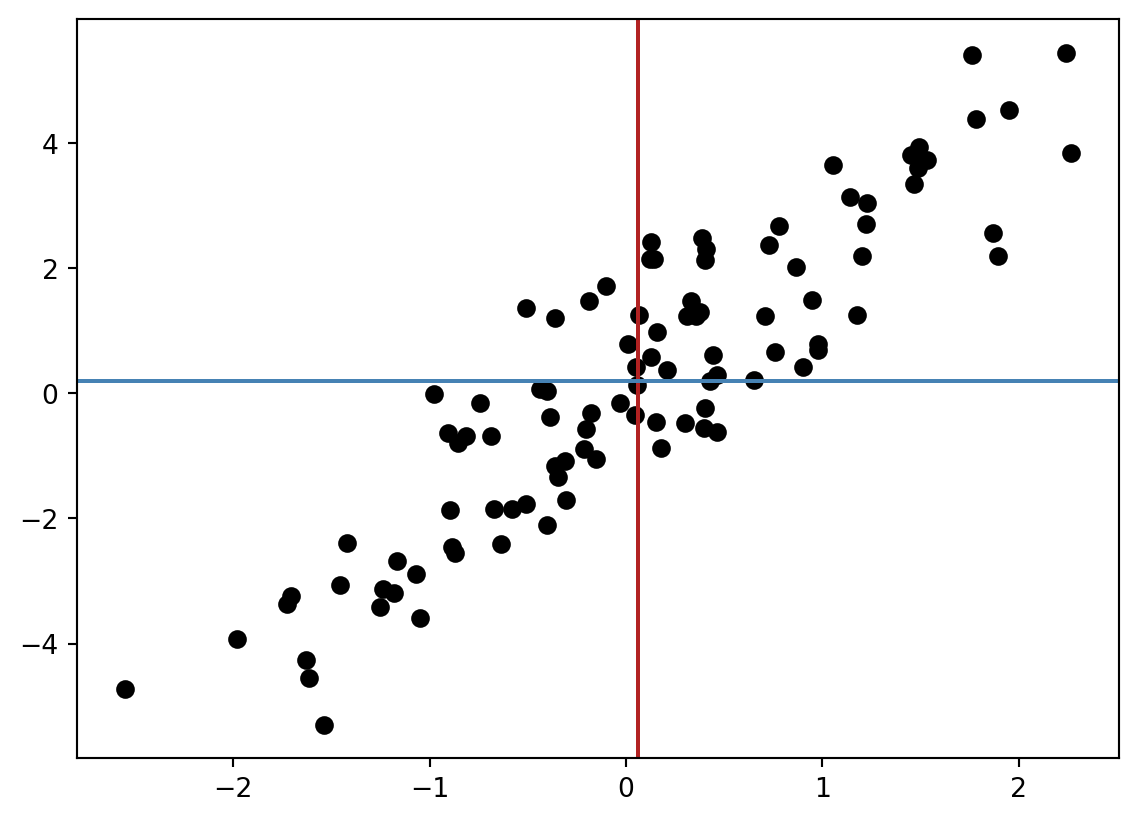

In [17]:
# Set seed for reproducibility
np.random.seed(0)

# Create a DataFrame
x = np.random.normal(size=100, loc=0, scale=1)
y = 2 * x + np.random.normal(size=100, scale=1)

# Plot
plt.scatter(x, y, color="black")
plt.axvline(x.mean(), color='firebrick', label='Mittelwert von x')
plt.axhline(y.mean(), color='steelblue', label='Mittelwert von y')



Die rote Linie ist bei dem Durchschnitt der $x$-Werte gezeichnet und die blaue Linie ist bei dem Durchschnitt der $y$-Werte gezeichnet. Die Kovarianz misst das durchschnittliche Produkt der Abweichungen der $x$- und $

Die zwei Mittelwertgeraden teilen die Ebene in vier Quadranten. Wenn das Produkt positiv ist, bedeutet das, dass wenn $x$ über seinem Durchschnitt liegt, $y$ auch über seinem Durchschnitt liegt. Wenn das Produkt negativ ist, bedeutet das, dass wenn $x$ über seinem Durchschnitt liegt, $y$ unter seinem Durchschnitt liegt.


In [18]:
# Kovarianz von zwei NumPy-Arrays
# Achten Sie darauf, dass eine ganze Kovarianzmatrix zurückgegeben wird.
# Die Diagonalelemente sind die Varianzen der einzelnen Arrays.

np.cov(x, y)

array([[1.02608749, 2.16986562],
       [2.16986562, 5.65646178]])

In [19]:
np.var(x, ddof=1)

1.0260874941564961

In [20]:
np.var(y, ddof=1)

5.656461778144082


Nur das *Vorzeichen* der Kovarianz ist wichtig. Die Größe der Kovarianz hängt von den Einheiten der Variablen ab. Um die Kovarianz dimensionslos zu machen, können wir sie durch das Produkt der Standardabweichungen der beiden Variablen teilen. Das gibt uns den Korrelationskoeffizienten.

In [21]:
np.cov(x, 20 * y)

array([[1.02608749e+00, 4.33973123e+01],
       [4.33973123e+01, 2.26258471e+03]])

Lasst uns auch ein Beispiel betrachten, wo die Kovarianz negativ ist. In dem folgenden Code ändern wir nur das Vorzeichen des Koeffizienten von `x` in der Gleichung von `y`.

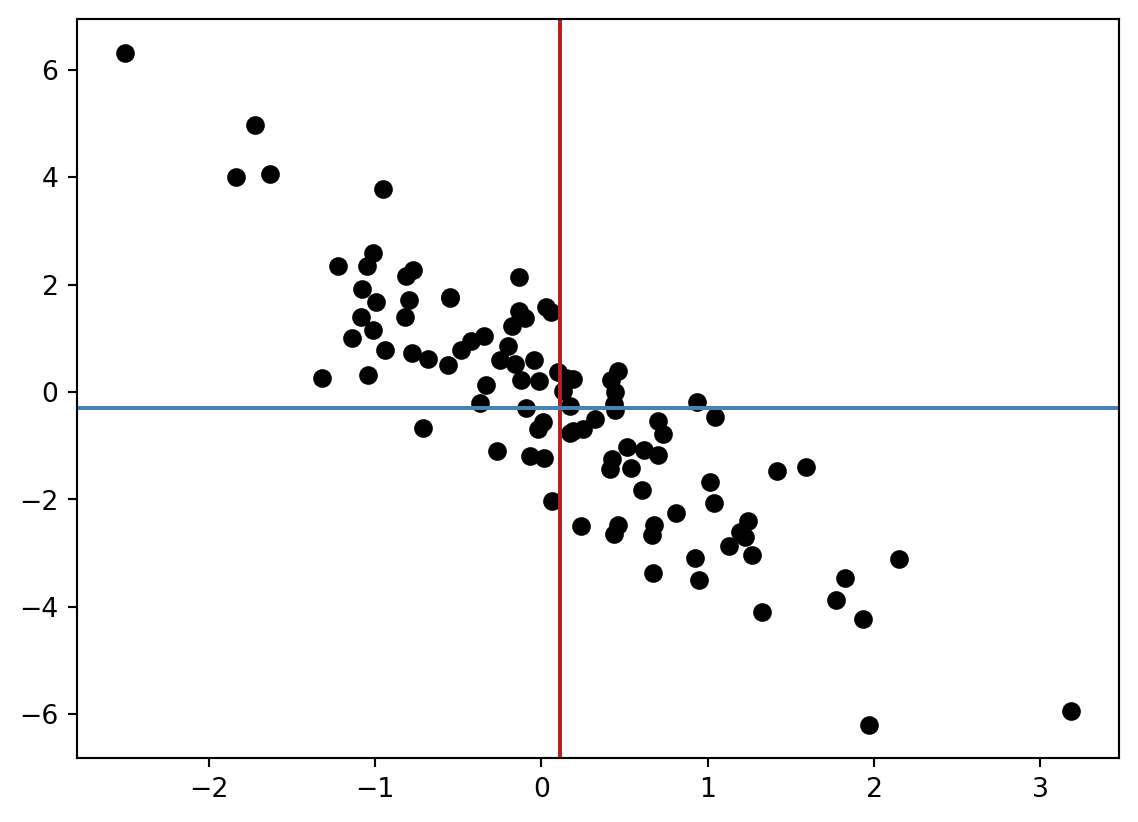

In [22]:
# Set seed for reproducibility
np.random.seed(23)

# Create a DataFrame
x1 = np.random.normal(size=100, loc=0, scale=1)
y1 = - 2 * x1 + np.random.normal(size=100, scale=1)

# Plot
plt.scatter(x1, y1, color="black")
plt.axvline(x1.mean(), color='firebrick', label='Mittelwert von x')
plt.axhline(y1.mean(), color='steelblue', label='Mittelwert von y')


In [23]:
np.cov(x1, y1)

array([[ 0.90312011, -1.81047309],
       [-1.81047309,  4.67610569]])


:::{#def-correlation}
## Korrelationskoeffizient

Der empirische Korrelationskoeffizient zwischen zwei Variablen $x$ und $y$ mit $n$ Werten ist definiert als

$$
r_{xy} = \frac{S_{xy}}{S_x S_y}
$$

dabei ist $S_{xy}$ die Kovarianz zwischen $x$ und $y$, und $S_x$ und $S_y$ sind die Standardabweichungen von $x$ und $y$.
:::

Weil die Kovarianz durch das Produkt der Standardabweichungen geteilt wird, ist der Korrelationskoeffizient dimensionslos. Außerdem ist der Korrelationskoeffizient immer zwischen -1 und 1. Ein Korrelationskoeffizient von 1 bedeutet, dass die beiden Variablen auf einer Geraden mit positiver Steigung liegen. Ein Korrelationskoeffizient von -1 bedeutet, dass die beiden Variablen auf einer Geraden mit negativer Steigung liegen. Ein Korrelationskoeffizient von 0 bedeutet, dass es keine *lineare* Assoziation zwischen den beiden Variablen gibt.



In [24]:
np.corrcoef(x, y)

array([[1.        , 0.90067522],
       [0.90067522, 1.        ]])

In [25]:
np.corrcoef(x1, y1)


array([[ 1.        , -0.88100254],
       [-0.88100254,  1.        ]])

## Übung

Definieren Sie eine Funktion, die für zwei Numpy-Arrays die KQ-Koeffizienten berechnet und als eine Tupel zurückgibt.

In [26]:
x = np.random.normal(size=100, loc=0, scale=1)
y = 1 + 2 * x + np.random.normal(size=100, scale=1.5)

In [27]:
def ols_two_variable(x, y):
    pass

In [28]:
from statsmodels.formula.api import ols

ols("y ~ x", data=pd.DataFrame({'x': x, 'y': y})).fit().params


Intercept    0.847662
x            2.153929
dtype: float64